In [2]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2

from skimage.io import imread_collection, imshow
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from skimage import color
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
sns.set()
plt.rcParams["axes.grid"] = False

/Users/arpit/opt/anaconda3/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [3]:
paintings = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg')

In [4]:
len(paintings)

122

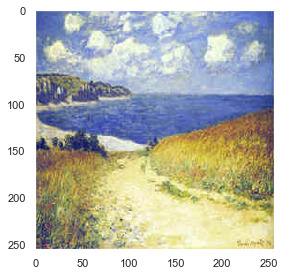

In [5]:
imshow(paintings[0])

In [7]:
generated = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [9]:
len(generated)

751

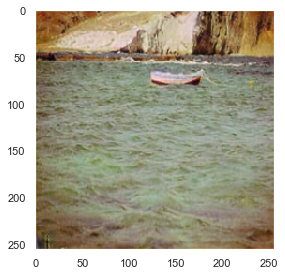

In [10]:
imshow(generated[0])

In [114]:
paint = paintings[0:100]
gen = generated[0:100]

In [154]:
#change this
def color_quantization(original, n_colors=256):
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors, centers, labels, kmeans.predict(arr), kmeans, arr

temp = paint[0]

temp.reshape((-1, 3)).shape

_,cen,lab,kmeans_temp, kmeans, arr = color_quantization(temp)

lab

kmeans_temp

arr.shape

# Loss using Kmeans and KNN classifier

In [166]:
## axis should be 0 not -1 and fir at the end then predict 
mp_pallete = []
cluster_pred = []
cen = []
mp = []
cl = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans, arr = color_quantization(i, 256)
    mp.extend(arr.astype(np.int))
    cl.extend(clusters.astype(np.int))
    cen.extend(centers.astype(np.int))

100%|██████████| 100/100 [42:58<00:00, 25.78s/it]


In [167]:
len(mp)

6553600

In [168]:
type(cen)

list

In [169]:
len(cen)

25600

In [170]:
len(np.unique(cen, axis=0))

25403

In [171]:
cen = [tuple(i) for i in cen]

In [214]:
random = range(0,len(np.unique(cen, axis=0)))

In [215]:
random

range(0, 25403)

In [263]:
my_dict = {k: v for k, v in zip(cen, random)}

In [264]:
len(my_dict)

25211

In [265]:
my_dict

{(137, 156, 199): 0,
 (138, 145, 99): 1,
 (245, 241, 196): 2,
 (76, 95, 168): 3,
 (218, 209, 134): 4,
 (197, 209, 197): 20941,
 (108, 83, 68): 6,
 (184, 175, 87): 7,
 (99, 121, 180): 8,
 (160, 152, 65): 9,
 (80, 85, 116): 10,
 (181, 195, 220): 11,
 (164, 179, 200): 12,
 (226, 237, 229): 13,
 (125, 133, 147): 14,
 (244, 233, 161): 15,
 (146, 131, 72): 16,
 (208, 202, 84): 17,
 (158, 159, 150): 18,
 (182, 183, 105): 19,
 (119, 141, 196): 20,
 (35, 39, 83): 21,
 (81, 99, 143): 22,
 (127, 97, 92): 23,
 (192, 185, 153): 24,
 (201, 175, 66): 25,
 (233, 220, 149): 26,
 (104, 100, 97): 27,
 (107, 110, 127): 28,
 (202, 214, 211): 29,
 (160, 177, 224): 30,
 (90, 112, 168): 31,
 (50, 67, 139): 32,
 (235, 229, 180): 33,
 (88, 65, 86): 34,
 (143, 156, 166): 35,
 (140, 109, 75): 36,
 (115, 137, 174): 37,
 (149, 163, 192): 38,
 (218, 230, 237): 39,
 (153, 161, 94): 40,
 (173, 162, 90): 41,
 (239, 248, 218): 42,
 (174, 188, 216): 43,
 (180, 190, 182): 44,
 (119, 112, 96): 13837,
 (160, 132, 64): 46,
 

In [266]:
len(my_dict)

25211

In [267]:
X = pd.DataFrame(my_dict.keys(), columns=list('RGB'))
Y = pd.DataFrame(my_dict.values(), columns=["Labels"])

In [268]:
X.shape

(25211, 3)

In [269]:
len(Y.values.ravel())

25211

In [270]:
knn = KNeighborsClassifier(n_neighbors=1) 

In [271]:
knn.fit(X,Y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [272]:
original_paint = []
for i in paint:
    original_paint.extend(i.reshape((-1, 3)))

In [273]:
len(original_paint)

6553600

In [284]:
original_paint = [tuple(i) for i in original_paint]
len(original_paint)

6553600

In [285]:
painting_pallete = knn.predict(original_paint)

In [275]:
pal = []
for i in gen:
    pal.extend(i.reshape((-1, 3)))

In [276]:
pal = [tuple(i) for i in pal]
len(pal)

6553600

In [277]:
generated_pallete = knn.predict(pal)

In [278]:
len(generated_pallete)

6553600

<ipython-input-286-7e86e18b21bd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


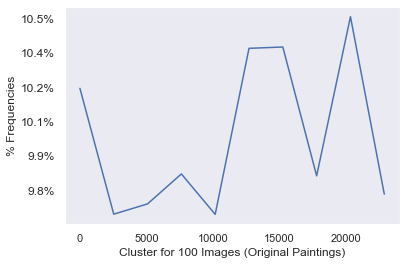

In [286]:
quantized_imX, binEdges_1 = np.histogram(painting_pallete)
#original paintings
fig, ax = plt.subplots()
total = sum(quantizedImX)
ax.plot(binEdges_1[:-1], quantized_imX)
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.xlabel('Cluster for 100 Images (Original Paintings)')
plt.ylabel('% Frequencies')
plt.draw()

<ipython-input-287-7e57e7616eee>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


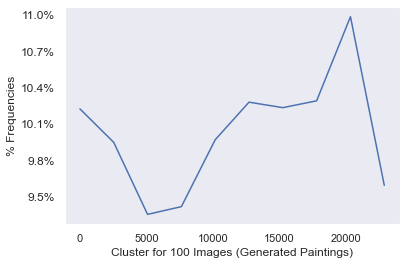

In [287]:
quantized_imY, binEdges_2 = np.histogram(generated_pallete)
#original paintings
fig, ax = plt.subplots()
ax.plot(binEdges_2[:-1], quantized_imY)
yvals = ax.get_yticks()
total = sum(quantizedImY)
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.xlabel('Cluster for 100 Images (Generated Paintings)')
plt.ylabel('% Frequencies')
plt.draw()

<Figure size 1440x1440 with 0 Axes>

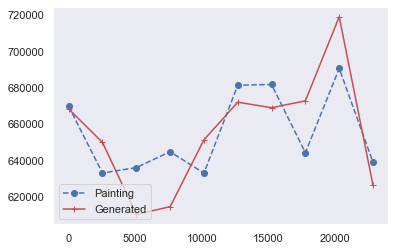

In [288]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges_2[:-1], quantized_imY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=3)
plt.draw()

<ipython-input-289-0f5d1a1d29bd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


<Figure size 1440x1440 with 0 Axes>

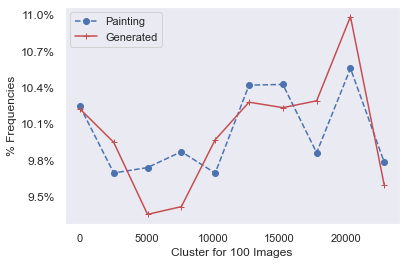

In [289]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(painting_pallete)
quantizedImY, binEdges2 = np.histogram(generated_pallete)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
total = sum(quantizedImY)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('% Frequencies')
plt.draw()

In [ ]:
#https://www.researchgate.net/post/Does_anyone_know_any_clustering_algorithm_that_use_predefined_centroids
#K = 1 Comment 2

# Loss using KMeans and MiniBatch KMeans

In [38]:
## axis should be 0 not -1 and fir at the end then predict 
mp_pallete = []
cluster_pred = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans = color_quantization(i, 256)
    mp_pallete.extend(np.unique((centers.astype(np.int)), axis=0))
    cluster_pred.extend(clusters.astype(np.int))

  0%|          | 0/10 [00:00<?, ?it/s]

[[238 216 131]
 [243 212 132]
 [249 207 135]
 ...
 [109  83  68]
 [118  89  91]
 [127  97 109]]


  0%|          | 0/10 [00:12<?, ?it/s]


KeyboardInterrupt: 

In [31]:
len(mp_pallete)

2560

In [12]:
len(cluster_pred)

655360

In [13]:
cluster_pred[0]

161

In [12]:
mp_pallete = np.array(mp_pallete)

In [13]:
kmeans = KMeans(n_clusters=mp_pallete.shape[0] , init=mp_pallete, max_iter=1, n_init=1)

In [14]:
paint = np.array(paint)

In [15]:
paint_fit  = paint.reshape((-1, 3))

In [16]:
paint_fit.shape

(655360, 3)

In [17]:
kmeans.fit(paint_fit)

KMeans(init=array([[ 32,  55,  66],
       [126, 175, 182],
       [194, 216, 234],
       ...,
       [165, 168, 123],
       [136, 115,  97],
       [159, 125,  84]]),
       max_iter=1, n_clusters=2560, n_init=1)

In [18]:
paint_predict = paint_fit.reshape((-1, 3))

In [19]:
paint_prediction = kmeans.predict(paint_predict)

In [20]:
gen = np.array(gen)
gen_toPredict = gen.reshape((-1, 3))

In [21]:
generated_prediction = kmeans.predict(gen_toPredict)

In [22]:
generated_prediction.shape

(655360,)

In [23]:
paint_prediction.shape

(655360,)

In [24]:
quantized_imX, binEdges_1 = np.histogram(paint_prediction)
print(quantized_imX)
print(binEdges_1)

[ 37617  88660  78241 131277  54953  40742  66119  51442  24203  82106]
[   0.   255.9  511.8  767.7 1023.6 1279.5 1535.4 1791.3 2047.2 2303.1
 2559. ]


In [25]:
quantized_imY, binEdges_2 = np.histogram(generated_prediction)
print(quantized_imY)
print(binEdges_2)

[52140 55603 95527 83073 65906 78990 52954 85307 17211 68649]
[   0.   255.9  511.8  767.7 1023.6 1279.5 1535.4 1791.3 2047.2 2303.1
 2559. ]


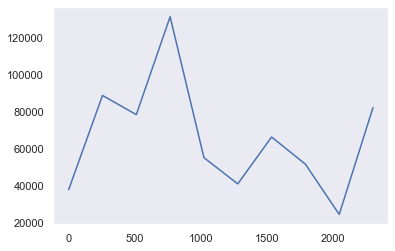

In [26]:
#original paintings
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX)

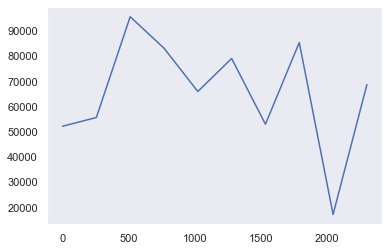

In [27]:
#generated paintings
fig, ax = plt.subplots()
ax.plot(binEdges_2[:-1], quantized_imY)

<Figure size 1440x1440 with 0 Axes>

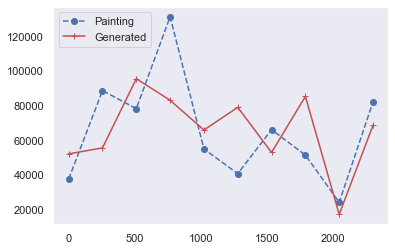

In [28]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges_2[:-1], quantized_imY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=2)
plt.draw()

https://stackoverflow.com/questions/58735282/difference-betweeen-mini-batch-k-means-and-sequential-online-kmeans

Mini-batch k-means does not converge to a local optimum.x

Essentially it uses a subsample of the data to do one step of k-means repeatedly. But because these samples may have different optima, it will not find the best, but move around inbetween of solutions to different parts. You stop after a fixed number of iterations - otherwise it would run forever. If you have well-behaved huge data, this may not make a big difference. if you have a difficult data set and not so much data, a fast (not Lloyd) KMeans will find a better solution, and also only take a few iterations. I doubt that many people have such large data sets where minibatch is a good idea.

In [60]:
paint100 = paintings[:100]
gen100 = generated[:100]

In [61]:
mpPallete = []
for i in tqdm(paint100):
    less_colors, centers, labels, clusters, kmeans = color_quantization(i, 256)
    mpPallete.extend(np.unique((centers.astype(np.int)), axis=-1))

100%|██████████| 100/100 [43:09<00:00, 25.90s/it]


In [62]:
mpPallete = np.array(mpPallete)

In [63]:
paint100 = np.array(paint100)
gen100 = np.array(gen100)

In [64]:
paint100  = paint100.reshape((-1, 3))
gen100  = gen100.reshape((-1, 3))

In [96]:
#MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=mpPallete.shape[0] , init=mpPallete, max_iter=1, n_init=1)

In [66]:
mbk.fit(paint100)

MiniBatchKMeans(init=array([[137, 156, 199],
       [138, 145,  99],
       [245, 241, 196],
       ...,
       [187, 194, 206],
       [ 99,  92,  99],
       [ 89, 115, 170]]),
                max_iter=1, n_clusters=25600, n_init=1)

In [97]:
paintPrediction = mbk.predict(paint100)

NotFittedError: This MiniBatchKMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [68]:
generatedPrediction = mbk.predict(gen100)

<Figure size 1440x1440 with 0 Axes>

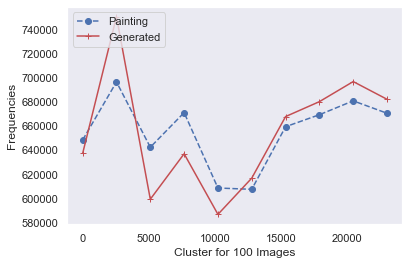

In [71]:
quantizedImX, binEdges1 = np.histogram(paintPrediction)
quantizedImY, binEdges2 = np.histogram(generatedPrediction)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('Frequencies')
plt.draw()

<ipython-input-95-d3b839010abd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


<Figure size 1440x1440 with 0 Axes>

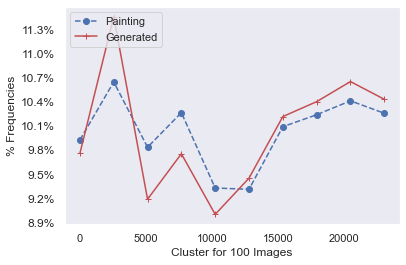

In [95]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(paintPrediction)
quantizedImY, binEdges2 = np.histogram(generatedPrediction)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
total = sum(quantizedImY)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('% Frequencies')
plt.draw()